#### Objective

- Use Welly to load two wells with Vp, Vs, and RHOB curves
- store wells in a single Pandas DataFrame
- filter and upscale all logs individually by well using Padas groupby method

#### Import libraries

In [1]:
import bruges as br
import numpy as np
import pandas as pd
from welly import Well
import matplotlib.pyplot as plt

#### Import wells

In [2]:
R39 = Well.from_las('../data/R-39.las')

In [3]:
w129 = Well.from_las('../data/P-129_out.las')

#### Make dataframes

- Make dataframes
- Deal with null values
- Select columns
- Add well name column
- Concatenate dataframes

Make dataframes

In [4]:
w39_df = R39.df()
w39_df = w39_df[['DT4P', 'DT4S', 'RHOB']]
w39_df.columns = ['DT', 'DTS', 'RHOB']
w39_df.describe(include = 'all')

,DT,DTS,RHOB
count,7843.000000,7843.000000,7843.000000
mean,279.843323,455.340913,2493.556531
std,25.963527,439.113290,114.662210
min,166.347500,-3278.379200,2050.229000
25%,262.778350,461.351100,2450.387250
50%,284.251700,515.766000,2505.075000
75%,299.587350,555.725100,2569.123050
max,348.946300,590.522000,3144.669700


In [5]:
w129_df = w129.df()
w129_df = w129_df[['DT', 'DTS', 'RHOB']]
w129_df.describe(include = 'all')

,DT,DTS,RHOB
count,10850.000000,10850.000000,12707.000000
mean,63.078827,107.128658,2.613912
std,6.529424,12.769174,0.254185
min,40.583134,78.108894,1.173953
25%,59.051755,95.865942,2.526586
50%,62.426868,104.755680,2.660130
75%,67.749138,117.113300,2.716321
max,112.469643,174.300812,4.628800


Dealing with nulls in well P-129

In [6]:
for x in w129_df.columns:
  print (x, w129_df[x].isnull().values.any())

print(w129_df.isnull().sum()) # finds how many missing points there are

DT True
DTS True
RHOB True
DT      1868
DTS     1868
RHOB      11
dtype: int64


It looks like there are several null valuesg. Below we replace missing values with the mean, then check again

In [7]:
w129_df['DT'].fillna(w129_df['DT'].mean(),inplace=True)
w129_df['DTS'].fillna(w129_df['DTS'].mean(),inplace=True)
w129_df['RHOB'].fillna(w129_df['RHOB'].mean(),inplace=True)

for x in w129_df.columns:
  print(x, w129_df[x].isnull().values.any())

DT False
DTS False
RHOB False


In [8]:
w129_df.describe(include = 'all')

,DT,DTS,RHOB
count,12718.000000,12718.000000,12718.000000
mean,63.078827,107.128658,2.613912
std,6.030834,11.794114,0.254075
min,40.583134,78.108894,1.173953
25%,59.555985,97.160316,2.526682
50%,63.078827,107.128658,2.660023
75%,66.679188,114.923914,2.716266
max,112.469643,174.300812,4.628800


Add well name columns

In [9]:
w39_df['DEPTH'] = w39_df.index
name = (['R-39']*len(w39_df))
w39_df['well'] = name
w39_df = w39_df.reset_index(drop=True)
w39_df.describe(include = 'all')

,DT,DTS,RHOB,DEPTH,well
count,7843.000000,7843.000000,7843.000000,7843.000000,7843
unique,NaN,NaN,NaN,NaN,1
top,NaN,NaN,NaN,NaN,R-39
freq,NaN,NaN,NaN,NaN,7843
mean,279.843323,455.340913,2493.556531,2790.596400,NaN
std,25.963527,439.113290,114.662210,345.067648,NaN
min,166.347500,-3278.379200,2050.229000,2193.036000,NaN
25%,262.778350,461.351100,2450.387250,2491.816200,NaN
50%,284.251700,515.766000,2505.075000,2790.596400,NaN
75%,299.587350,555.725100,2569.123050,3089.376600,NaN


In [10]:
w129_df['DEPTH'] = w129_df.index
name = (['P-129']*len(w129_df))
w129_df['well'] = name
w129_df = w129_df.reset_index(drop=True)
w129_df.describe(include = 'all')

,DT,DTS,RHOB,DEPTH,well
count,12718.000000,12718.000000,12718.000000,12718.00000,12718
unique,NaN,NaN,NaN,NaN,1
top,NaN,NaN,NaN,NaN,P-129
freq,NaN,NaN,NaN,NaN,12718
mean,63.078827,107.128658,2.613912,970.10220,NaN
std,6.030834,11.794114,0.254075,559.53884,NaN
min,40.583134,78.108894,1.173953,1.06680,NaN
25%,59.555985,97.160316,2.526682,485.58450,NaN
50%,63.078827,107.128658,2.660023,970.10220,NaN
75%,66.679188,114.923914,2.716266,1454.61990,NaN


Concatenate dataframes

In [11]:
wells = pd.DataFrame()

for i,df in enumerate([ w129_df, w39_df]):
    wells=wells.append(df)   
wells.describe(include = 'all')

,DT,DTS,RHOB,DEPTH,well
count,20561.000000,20561.000000,20561.000000,20561.000000,20561
unique,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,P-129
freq,NaN,NaN,NaN,NaN,12718
mean,145.763713,239.954333,952.784768,1664.530293,NaN
std,106.613837,319.752922,1212.057079,1010.484213,NaN
min,40.583134,-3278.379200,1.173953,1.066800,NaN
25%,62.008976,102.905281,2.629247,784.402800,NaN
50%,68.277443,118.183243,2.731956,1567.738800,NaN
75%,272.235000,488.466800,2476.824000,2604.820800,NaN


#### Convert to velocity

In [12]:
wells['Vp'] = 3.048e5 / wells.DT
wells['Vs']= 3.048e5 / wells.DTS
wells.drop(wells.columns[[0, 1]], inplace=True, axis=1) 
wells = wells[['DEPTH', 'Vp', 'Vs', 'RHOB', 'well']]
wells.describe(include = 'all')

,DEPTH,Vp,Vs,RHOB,well
count,20561.000000,20561.000000,20561.000000,20561.000000,20561
unique,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,P-129
freq,NaN,NaN,NaN,NaN,12718
mean,1664.530293,3435.515964,2010.235450,952.784768,NaN
std,1010.484213,1872.243067,1133.054767,1212.057079,NaN
min,1.066800,873.486837,-92.972771,1.173953,NaN
25%,784.402800,1119.620916,620.031282,2.629247,NaN
50%,1567.738800,4464.139061,2565.154880,2.731956,NaN
75%,2604.820800,4915.417408,2947.088438,2476.824000,NaN


#### Despike Vp, Vs, and RHOB

##### LOGIC:

group dataframe by well

    for each well

        for each of Vp, Vs, RHOB
    
            smooth log using Bruges' median
        
        


In [13]:
logs = ['Vp', 'Vs', 'RHOB']

In [14]:
window = 11

In [15]:
wells_sm = pd.DataFrame()

grouped = wells['well'].unique()

for well in grouped:    
    new_df = pd.DataFrame()   
    for log in logs:
        sm = br.filters.mean(arr=pd.Series(wells[log][wells['well'] == well]), size= window)
        new_df[str(log) + '_sm'] = sm 
    wells_sm = pd.concat([wells_sm, new_df])

In [16]:
wells_despiked = (np.concatenate((wells.values, wells_sm.values), axis=1))
cols = list(wells) + list(wells_sm)
wells_despiked_df = pd.DataFrame(wells_despiked, columns=cols)
wells_despiked_df.describe()

,DEPTH,Vp,Vs,RHOB,well,Vp_sm,Vs_sm,RHOB_sm
count,20561.0000,20561.000000,20561.000000,20561.00000,20561,20561.000000,20561.000000,20561.00000
unique,20561.0000,18174.000000,18097.000000,19889.00000,2,18581.000000,18558.000000,20042.00000
top,2425.5984,4832.049264,2845.177066,2.39882,P-129,4832.049264,2845.177066,2.39882
freq,1.0000,1868.000000,1868.000000,195.00000,12718,1858.000000,1858.000000,170.00000


Make sure results make sense

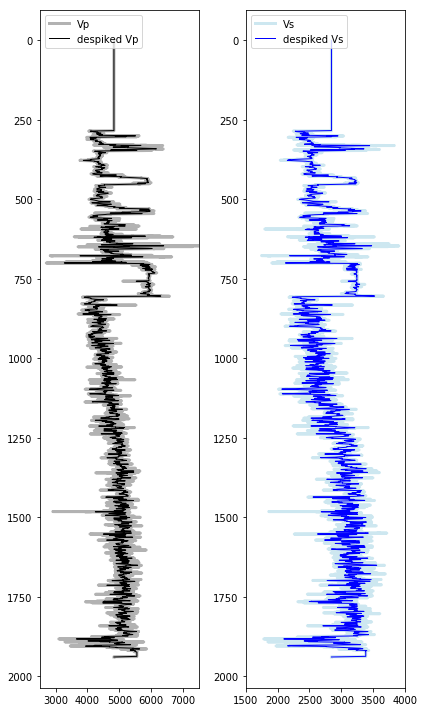

In [17]:
fig = plt.figure(figsize=(6,10))
ax0 = fig.add_subplot(121)
ax0.plot(wells_despiked_df.loc[wells_despiked_df.well == 'P-129', 'Vp'], 
         wells_despiked_df.loc[wells_despiked_df.well == 'P-129', 'DEPTH'],
                                 'gray', alpha=0.6, linewidth = 3, label='Vp')
ax0.plot(wells_despiked_df.loc[wells_despiked_df.well == 'P-129', 'Vp_sm'], 
         wells_despiked_df.loc[wells_despiked_df.well == 'P-129', 'DEPTH'],
                                 'k', linewidth = 1, label='despiked Vp')
ax0.set_xlim([2500, 7500])
ax0.legend( loc='upper left')
plt.gca().invert_yaxis()


ax1 = fig.add_subplot(122)
ax1.plot(wells_despiked_df.loc[wells_despiked_df.well == 'P-129', 'Vs'], 
         wells_despiked_df.loc[wells_despiked_df.well == 'P-129', 'DEPTH'],
                                 'lightblue', alpha=0.6, linewidth = 3, label='Vs')
ax1.plot(wells_despiked_df.loc[wells_despiked_df.well == 'P-129', 'Vs_sm'], 
         wells_despiked_df.loc[wells_despiked_df.well == 'P-129', 'DEPTH'],
                                 'b', linewidth = 1, label='despiked Vs')
ax1.set_xlim([1500, 4000])
ax1.legend( loc='upper left')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

#### Despike Vp, Vs, and RHOB

##### To be continued...